In [1]:
import json
import collections
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
np.random.seed(0)

In [60]:
from datasets import load_dataset

# Load the dataset
data = load_dataset("pufanyi/cassava-leaf-disease-classification", "balanced")

# View dataset information
print(data)



DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'label'],
        num_rows: 4935
    })
    validation: Dataset({
        features: ['image_id', 'image', 'label'],
        num_rows: 500
    })
    test: Dataset({
        features: ['image_id', 'image', 'label'],
        num_rows: 1
    })
})


In [61]:
train_data = data["train"]
train_data

Dataset({
    features: ['image_id', 'image', 'label'],
    num_rows: 4935
})

In [62]:
val_data = data["validation"]
val_data

Dataset({
    features: ['image_id', 'image', 'label'],
    num_rows: 500
})

In [63]:
train_data = train_data.to_pandas()
val_data = val_data.to_pandas()

In [64]:
full_data = pd.concat([train_data, val_data], ignore_index=True)

## Train Data EDA

In [65]:
labels = train_data["label"].unique()
labels

array([0, 3, 1, 2, 4])

In [66]:
df_label = {}
for label in labels:
    df_label[label] = val_data[val_data["label"] == label]

In [67]:
for label, df in df_label.items():
    print(f"{label}: {len(df)}")

0: 100
3: 100
1: 100
2: 100
4: 100


In [68]:
# val_ds = load_dataset("pufanyi/cassava-leaf-disease-classification", "full", split="validation")

In [69]:
json_data = {
	"0": "Cassava Bacterial Blight (CBB)",
	"1": "Cassava Brown Streak Disease (CBSD)",
	"2": "Cassava Green Mottle (CGM)",
	"3": "Cassava Mosaic Disease (CMD)",
	"4": "Healthy"
}
json_data

{'0': 'Cassava Bacterial Blight (CBB)',
 '1': 'Cassava Brown Streak Disease (CBSD)',
 '2': 'Cassava Green Mottle (CGM)',
 '3': 'Cassava Mosaic Disease (CMD)',
 '4': 'Healthy'}

In [70]:
simple_data = {
	"0": "CBB",
	"1": "CBSD",
	"2": "CGM",
	"3": "CMD",
	"4": "Healthy"
}

In [71]:
train_data['Disease'] = train_data['label'].apply(lambda x: str(x)+' : '+json_data[str(x)])
train_data

,image_id,image,label,Disease
0,868275841.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
1,53200283.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
2,2536030910.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
3,1021758544.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
4,201421885.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
...,...,...,...,...
4930,27047804.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,4,4 : Healthy
4931,982556736.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,4,4 : Healthy
4932,2531400697.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,4,4 : Healthy
4933,2090702902.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,4,4 : Healthy


In [72]:
val_data['Disease'] = val_data['label'].apply(lambda x: str(x)+' : '+json_data[str(x)])
val_data

,image_id,image,label,Disease
0,3474522679.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
1,2399673034.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
2,2599515864.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
3,3454772304.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
4,1258586775.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,0 : Cassava Bacterial Blight (CBB)
...,...,...,...,...
495,3924666081.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,4,4 : Healthy
496,2919116944.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,4,4 : Healthy
497,2791918976.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,4,4 : Healthy
498,3560558038.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,4,4 : Healthy


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Custom Morandi color palette
morandi_palette = sns.color_palette([
    "#A4B0A4", "#D0B4A0", "#D4A5A5", "#A8C5D2", "#A9B8B0",  # Example Morandi tones
])

# Count occurrences of each label and preserve label order (0, 1, 2, 3, 4)
def plot(train_df, x):
    disease_counts = train_df.groupby('label').size().reset_index(name='Count')
    disease_counts['Disease'] = disease_counts['label'].apply(lambda x: str(x) + ' : ' + simple_data[str(x)])

    # Plot a bar plot with the Morandi color palette
    plt.figure(figsize=(8, 5))
    barplot = sns.barplot(
        y='Disease', x='Count', data=disease_counts, palette=morandi_palette, orient='h', order=disease_counts['Disease']
    )

    # Add counts to the right end of each bar
    for i, (value, disease) in enumerate(zip(disease_counts['Count'], disease_counts['Disease'])):
        barplot.text(
            value - max(disease_counts['Count']) * 0.007,  # Slightly left of the bar edge
            i,                                           # Y-axis position
            str(value),                                  # Text to display
            color="black",                               # Text color for visibility
            ha="right",                                  # Align text to the right
            va="center",                                 # Center vertically
            fontsize=8                                  # Text font size
        )

    # Set plot labels and title
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Disease', fontsize=12)
    plt.title(x, fontsize=14)
    plt.tight_layout()

    # Show the plot
    # plt.show()
    plt.savefig(f"{x}.pdf")


/tmp/ipykernel_383678/1328476946.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


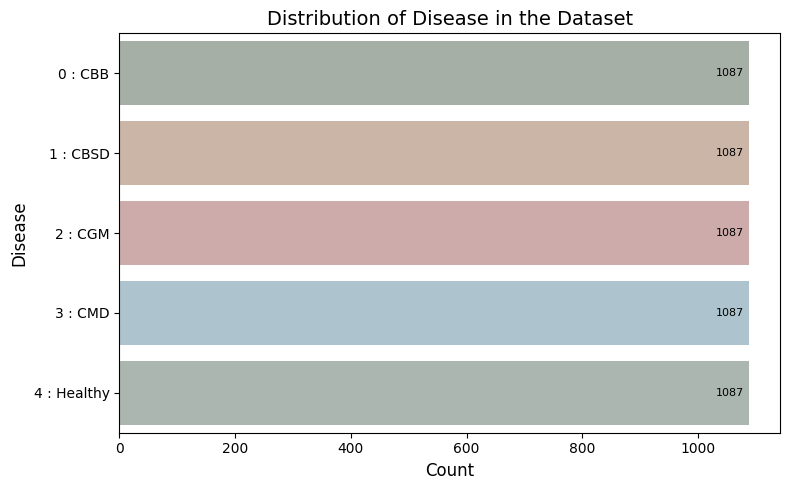

In [74]:
plot(full_data, "Distribution of Disease in the Dataset")

In [75]:
def plot_pie(df, x):
    # Count occurrences of each label
    disease_counts = df.groupby('label').size().reset_index(name='Count')
    disease_counts['Disease'] = disease_counts['label'].apply(lambda x: str(x) + ' : ' + simple_data[str(x)])

    # Plot a pie chart with the Morandi color palette
    plt.figure(figsize=(6, 6))
    piechart = plt.pie(
        disease_counts['Count'], labels=disease_counts['Disease'], autopct='%1.1f%%', startangle=90, colors=morandi_palette
    )

    # Set plot title
    plt.title(x, fontsize=14)

    # Show the plot
    # plt.show()
    plt.savefig(f"{x}.pdf", bbox_inches='tight')

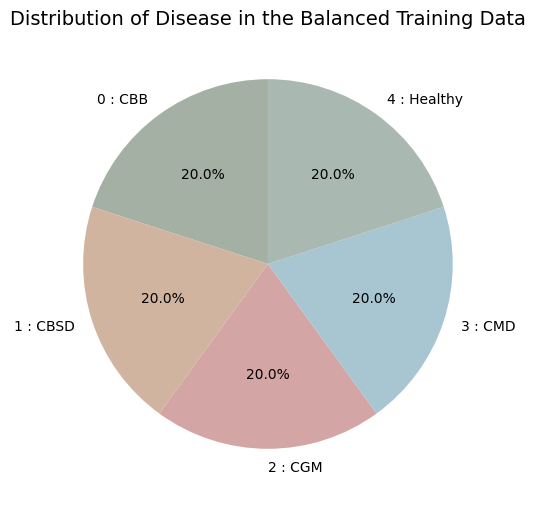

In [76]:
plot_pie(train_data, "Distribution of Disease in the Balanced Training Data")

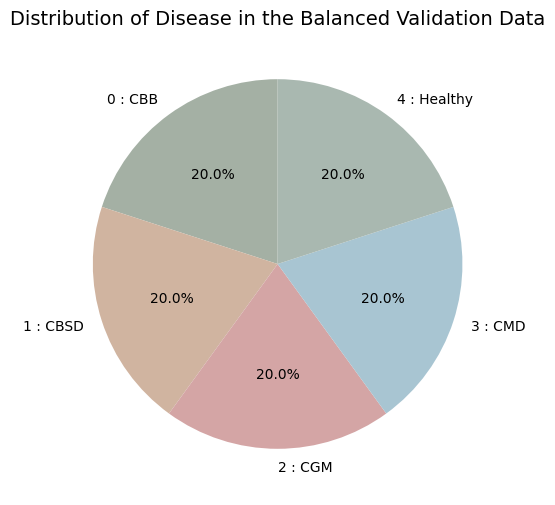

In [77]:
plot_pie(val_data, "Distribution of Disease in the Balanced Validation Data")

/tmp/ipykernel_3978806/1042297445.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


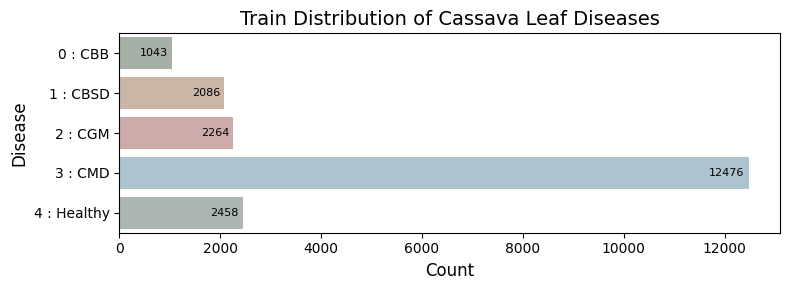

In [49]:
plot(train_data, 'Train Distribution of Cassava Leaf Diseases')

/tmp/ipykernel_3978806/1042297445.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


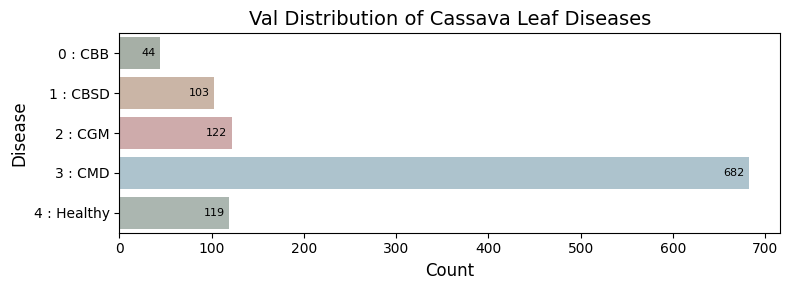

In [50]:
plot(val_data, 'Val Distribution of Cassava Leaf Diseases')

In [19]:
print(train_data.iloc[0])  # View the structure of a single data row


image_id                                       2590392693.jpg
image       {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
label                                                       3
Disease                      3 : Cassava Mosaic Disease (CMD)
Name: 0, dtype: object


In [ ]:
pip install torch

In [74]:
import matplotlib.pyplot as plt
from datasets import load_dataset
from torchvision.transforms import (
    Compose,
    Normalize,
    ToTensor,
    RandomRotation,
    RandomHorizontalFlip,
    RandomVerticalFlip,
    RandomResizedCrop,
    ColorJitter,
    Resize,
    CenterCrop,
)
from PIL import Image
import io
import torch


# Load dataset and convert to pandas
data = load_dataset("pufanyi/cassava-leaf-disease-classification", "full")
train_df = data["train"].to_pandas()
val_df = data["validation"].to_pandas()

# Extract a single image from the train and validation sets
train_image_data = train_df.iloc[0]
val_image_data = val_df.iloc[0]

# Decode the image bytes
def decode_image(image_data):
    return Image.open(io.BytesIO(image_data["image"]["bytes"]))

train_image = decode_image(train_image_data)
val_image = decode_image(val_image_data)

# Define training transformations
image_mean, image_std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
size = 224
normalize = Normalize(mean=image_mean, std=image_std)

train_augmentations = {
    "(a) Original": lambda x: x,
    "(b) Random Rotation": RandomRotation(degrees=45),
    "(c) Random Resized Crop": RandomResizedCrop(size),
    "(d) Random Horizontal Flip": RandomHorizontalFlip(),
    "(e) Random Vertical Flip": RandomVerticalFlip(),
    "(f) Color Jitter": ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    # "(g) To Tensor & Normalize": Compose([ToTensor(), normalize]),
}

# Define validation transformations
val_augmentations = {
    "(a) Original": lambda x: x,
    "(b) Resize": Resize(size),
    "(c) Center Crop": CenterCrop(size),
    # "(d) To Tensor & Normalize": Compose([ToTensor(), normalize]),
}

def visualize_augmentations(image, augmentations, title_prefix):
    plt.figure(figsize=(8, 6))
    for i, (label, transform) in enumerate(augmentations.items()):
        plt.subplot(2, 3, i + 1)
        transformed_image = transform(image) if label == "(a) Original" else transform(image.copy())
        if isinstance(transformed_image, torch.Tensor):  # Convert tensor to image for visualization
            transformed_image = transformed_image.permute(1, 2, 0).numpy()
            transformed_image = (transformed_image * image_std + image_mean).clip(0, 1)
        plt.imshow(transformed_image)
        plt.axis("off")
        # Add label below the image
        plt.text(
            0.5, -0.1, label, fontsize=10, ha="center", transform=plt.gca().transAxes
        )
        image = transformed_image
    plt.tight_layout()
    # plt.suptitle(f"{title_prefix} Augmentations", fontsize=14, y=0.92)
    # plt.show()
    plt.savefig(f"{title_prefix}.pdf", bbox_inches='tight')


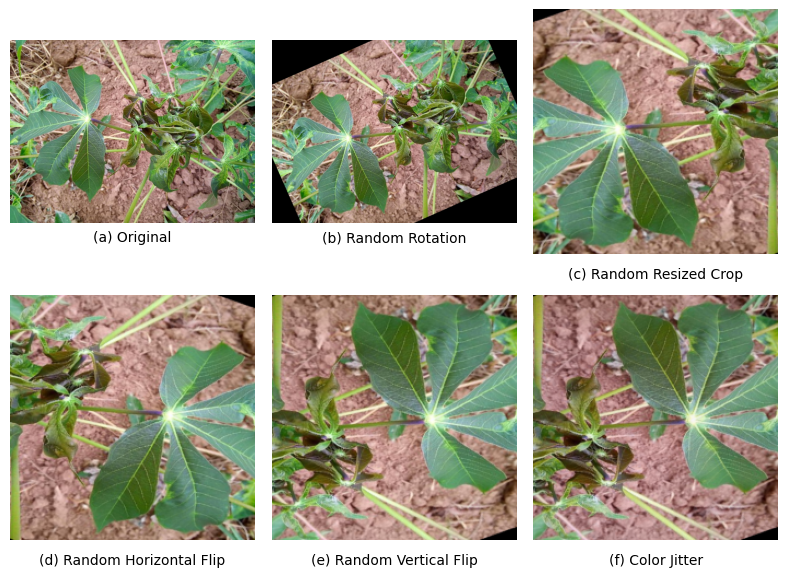

In [75]:
# Visualize training augmentations
torch.manual_seed(24)
visualize_augmentations(train_image, train_augmentations, "TrainTransform")

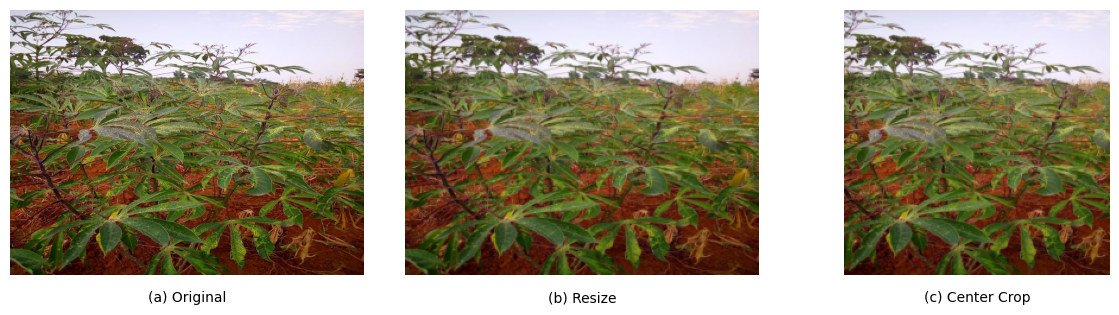

In [73]:
# Visualize validation preprocessing
visualize_augmentations(val_image, val_augmentations, "ValidationTransform")